# Part I.I - Obtain App Info Data

In [32]:
## Import necessary libraries

# retrieves app info from App Store
from itunes_app_scraper.scraper import AppStoreScraper
# retrieves reviews from App Store
from app_store_scraper import AppStore

# retrieves app info AND reviews from Google Play
from google_play_scraper import app, Sort, reviews, reviews_all

# pretty print data structures
from pprint import pprint

# for storing in MongoDB
import pymongo
from pymongo import MongoClient

import datetime as dt
from tzlocal import get_localzone

import random
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Read in file containing app details, 
  ## need the app IDs for scraping stores
app_df = pd.read_csv('Data/mha_app_info.csv')
app_df.head()

,app_name,iOS,iOS_revs,iOS_app_name,iOS_app_id,android,android_revs,android_appID
0,Aloe Bud,1,3000,aloe-bud,1318382054,0,0,NaN
1,Aura,1,22100,aura-meditation-sleep,1114223104,1,10400,com.aurahealth
2,BetterHelp,1,32400,betterhelp-online-counseling,995252384,1,15300,com.betterhelp
3,Breathe2Relax,1,200,breathe2relax,425720246,1,1100,org.t2health.breathe2relax
4,Breathwrk: Breathing Exercises,1,10400,breathwrk,1481804500,0,0,NaN


In [3]:
## Store list of app ids to loop through for both stores
app_store_ids = list(app_df['iOS_app_id'])
google_play_ids = list(app_df['android_appID'].dropna())

In [4]:
## Check number of apps found in App Store
len(app_store_ids)

64

In [5]:
## Only 47 of the total 56 are also available for Android
len(google_play_ids)

53

## Set Up MongoDB for Project

In [6]:
## Set up Mongo client
client = MongoClient(host='localhost', port=27018)

In [7]:
## Set up new database for project
mha_proj_db = client['mha_proj_db']

## Scrape General Info about Each App
### Scrape App Info from App Store

In [8]:
## Set up App Store Scraper
scraper = AppStoreScraper()
app_store_list = list(scraper.get_multiple_app_details(app_store_ids))
pprint(app_store_list)

https://itunes.apple.com/lookup?id=1318382054&country=nl&entity=software
https://itunes.apple.com/lookup?id=1114223104&country=nl&entity=software
https://itunes.apple.com/lookup?id=995252384&country=nl&entity=software
https://itunes.apple.com/lookup?id=425720246&country=nl&entity=software
https://itunes.apple.com/lookup?id=1481804500&country=nl&entity=software
https://itunes.apple.com/lookup?id=920161006&country=nl&entity=software
https://itunes.apple.com/lookup?id=1450365119&country=nl&entity=software
https://itunes.apple.com/lookup?id=571800810&country=nl&entity=software
https://itunes.apple.com/lookup?id=1010391170&country=nl&entity=software
https://itunes.apple.com/lookup?id=1194023242&country=nl&entity=software
https://itunes.apple.com/lookup?id=1452264969&country=nl&entity=software
https://itunes.apple.com/lookup?id=1184456130&country=nl&entity=software
https://itunes.apple.com/lookup?id=1318726049&country=nl&entity=software
https://itunes.apple.com/lookup?id=1203637303&country=n

                 '\n'
                 'Finally, the app integrates with a clinician app. If your '
                 'therapist is signed up and you are set up to share your '
                 'diary card and exercises then you don’t have to share via '
                 'email every week. Your therapist can engage with you in real '
                 'time.\n'
                 '\n'
                 "The app integrates with Apple's HealthKit to record your "
                 'meditation minutes to Health Kit mindfulness.\n'
                 '\n'
                 'SUBSCRIPTION\n'
                 '\n'
                 ' Payment will be charged to iTunes Account at confirmation '
                 'of purchase\n'
                 '*You have a choice of being billed monthly for $11.99/month '
                 'or a discounted price of $59.99 every six months. \n'
                 '• Subscription automatically renews unless auto-renew is '
                 'turned off at least 24-hours before

                 'The TODAY Show\n'
                 '"These are things you can do every day -- tasks you can '
                 'complete and be rewarded for -- to feel better, reduce '
                 'stress, live a better life, and actually be happy."\n'
                 '\n'
                 "WE'RE GRATEFUL TO BE CHANGING LIVES EVERY DAY:\n"
                 '\n'
                 '"I absolutely love the Happify app! I’ve been using it for '
                 'years and it really has transformed my life more than ANY '
                 'OTHER TOOL I’ve used to grow my positivity! The world would '
                 'be a much better place if everyone used it...And it’s FUN!" '
                 '-Ashley S., Tampa, FL\n'
                 '\n'
                 '"Happify has helped me develop new skills in a variety of '
                 'domains such as preventing worry, cultivating my '
                 'relationships, and setting better sleep habits." - Elaina '
                 'S.,

                 'Less Guided Meditations\n'
                 'Body Scan\n'
                 '__________________________________________________\n'
                 '\n'
                 '9,99USD per month (US-based pricing)\n'
                 '59,99USD per year\n'
                 '\n'
                 'Subscription Pricing and Terms: \n'
                 'The iTunes Account will be charged for renewal within 24 '
                 'hours prior to the end of the current period. The '
                 'subscription automatically renews with the same price unless '
                 'auto-renew is turned off at least 24-hours before the end of '
                 'the current period. You can go to your iTunes Account '
                 'settings to manage your subscription and turn off '
                 'auto-renew. Your iTunes Account will be charged when the '
                 'purchase is confirmed. Any unused portion of a free trial '
                 'period, if offered, will be for

                 '\n'
                 'Subscription Pricing and Terms\n'
                 '\n'
                 "Get full access to all Rootd's content and features by "
                 'purchasing a monthly or yearly auto-renewing Full Access '
                 'subscription. Or get lifetime full access for a one-time '
                 'payment. Pricing may vary by country.\n'
                 '\n'
                 'Payment will be charged to your iTunes Account at '
                 'confirmation of purchase. Your Rootd subscription will '
                 'automatically renew at the end of each term and your credit '
                 'card will be charged through your iTunes account unless '
                 'auto-renew is turned off at least 24-hours before the end of '
                 'the current period. Subscriptions may be managed and '
                 'auto-renewal turned off any time from your iTunes Account '
                 'Settings after purchase.\n'
               

                 'potential to overcome tough situations and achieve goals '
                 'that matter most. \n'
                 '\n'
                 'Created by award-winning game designer Jane McGonigal, '
                 'SuperBetter is powered by the Live Gamefully® method; a '
                 'framework that activates the psychological strengths of game '
                 'play to build resilience and be stronger for life. Proven '
                 'results in just minutes a\xa0day.\n'
                 '\n'
                 '►► Why play SuperBetter?\n'
                 '\n'
                 'Here are some reasons people are using SuperBetter:\n'
                 '\n'
                 '- To adopt a new habit, learn or improve a skill, strengthen '
                 'a relationship, make a physical or athletic breakthrough, '
                 'complete a meaningful project, or pursue a lifelong dream.\n'
                 '- To beat depression, overcome anxiety, manage stress,

                 'anxiety, and depression. Youper empowers you to take control '
                 'of your mental health using quick guided therapy exercises '
                 'to increase happiness, find motivation, feel more calm, '
                 'practice gratitude, improve sleep, increase mindfulness, '
                 'stop worrying, change negative thinking, deal with difficult '
                 'situations, and improve your behavior.\n'
                 '\n'
                 'Youper is fully personalized to you. So, that’s okay if you '
                 'have never tried therapy before - Youper will guide you '
                 'every step of the way, and if you are seeing a therapist, it '
                 'works well alongside therapy by supporting you between '
                 'sessions and helping you track your progress. \n'
                 '\n'
                 'Youper also provides access to an entire library of soothing '
                 'and calming audio track

In [9]:
## Successfully got data for all 64 apps in App Store
len(app_store_list)

64

In [10]:
## Print results obtained for first app: Aloe Bud
pprint(app_store_list[0])

{'advisories': '',
 'appletvScreenshotUrls': '',
 'artistId': 1170681391,
 'artistName': 'Aloebud LLC',
 'artistViewUrl': 'https://apps.apple.com/nl/developer/aloebud-llc/id1170681391?uo=4',
 'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/100x100bb.jpg',
 'artworkUrl512': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/512x512bb.jpg',
 'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/60x60bb.jpg',
 'averageUserRating': 4.61538,
 'averageUserRatingForCurrentVersion': 4.61538,
 'bundleId': 'club.aloe.Aloe',
 'contentAdvisoryRating': '4+',
 'currency': 'EUR',
 'currentVersionReleaseDate': '2020-06-25T21:20:25Z',
 'description': 'Aloe Bud is your all-in-one, self-care pocket companion. We '
                'gently bring awareness to self-care activities, using '
                'e

In [31]:
pd.DataFrame(app_store_list)

,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,isGameCenterEnabled,...,version,wrapperType,artistId,artistName,genres,price,description,bundleId,userRatingCount,_id
0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aloebud-ll...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,True,...,1.1,software,1170681391,Aloebud LLC,"Gezondheid en fitness,Lifestyle",0.00,"Aloe Bud is your all-in-one, self-care pocket ...",club.aloe.Aloe,52,605a2105fa456042d0948f3e
1,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aura-healt...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,False,...,3.11.6,software,1042329742,Aura Health Inc.,"Gezondheid en fitness,Lifestyle",0.00,"** As loved by Apple (Best of 2017, #1 New App...",com.AuraMobile,224,605a2105fa456042d0948f3f
2,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/betterhelp...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,False,...,9.9,software,995252383,BetterHelp,"Gezondheid en fitness,Lifestyle",0.00,BetterHelp is the convenient way to get profes...,com.ionicframework.betterhelp369708,42,605a2105fa456042d0948f40
3,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/national-c...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,False,...,1.7.7,software,499648345,National Center for Telehealth & Technology,"Gezondheid en fitness,Geneeskunde",0.00,Breathe2Relax is a portable stress management ...,org.t2health.BreatheTwoRelax,6,605a2105fa456042d0948f41
4,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/breathwork...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,False,...,5.0.3,software,1481804499,Breathwork Inc.,Gezondheid en fitness,0.00,Breathwrk guides you through quick and powerfu...,com.breathwrk.ios,164,605a2105fa456042d0948f42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/wisdo/id12...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Regelmatig/Intense medische/behandelingsinform...,False,...,2.75,software,1266661757,Wisdo,"Gezondheid en fitness,Sociaal netwerken",0.00,"Wisdo is a friendly, safe place to share life ...",com.wisdo.wisdo,63,605a2105fa456042d0948f79
60,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/woebot-lab...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...","Soms/Milde medis

#### Store Scraped App Store Data in New MongoDB Collection

In [11]:
## Set up new collection within project db
app_store_info = mha_proj_db['app_store_info']

## Insert app details into app_store_info collection
app_store_info.insert_many(app_store_list)

In [12]:
## Check that the new db for the project exists
  ## (lazily created upon insertion of data into a collection)
list(client.list_databases())

[{'name': 'admin', 'sizeOnDisk': 32768.0, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 12288.0, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 32768.0, 'empty': False},
 {'name': 'mha_proj_db', 'sizeOnDisk': 8192.0, 'empty': False}]

In [13]:
# Turns query (here, basically SELECT *) into a list and creates df from that list of dicts
app_store_info_df = pd.DataFrame(list(app_store_info.find({})))
app_store_info_df

,_id,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,...,currency,version,wrapperType,artistId,artistName,genres,price,description,bundleId,userRatingCount
0,605a2105fa456042d0948f3e,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aloebud-ll...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,...,EUR,1.1,software,1170681391,Aloebud LLC,"Gezondheid en fitness,Lifestyle",0.00,"Aloe Bud is your all-in-one, self-care pocket ...",club.aloe.Aloe,52
1,605a2105fa456042d0948f3f,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aura-healt...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,...,EUR,3.11.6,software,1042329742,Aura Health Inc.,"Gezondheid en fitness,Lifestyle",0.00,"** As loved by Apple (Best of 2017, #1 New App...",com.AuraMobile,224
2,605a2105fa456042d0948f40,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/betterhelp...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,...,EUR,9.9,software,995252383,BetterHelp,"Gezondheid en fitness,Lifestyle",0.00,BetterHelp is the convenient way to get profes...,com.ionicframework.betterhelp369708,42
3,605a2105fa456042d0948f41,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/national-c...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,...,EUR,1.7.7,software,499648345,National Center for Telehealth & Technology,"Gezondheid en fitness,Geneeskunde",0.00,Breathe2Relax is a portable stress management ...,org.t2health.BreatheTwoRelax,6
4,605a2105fa456042d0948f42,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/breathwork...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,...,EUR,5.0.3,software,1481804499,Breathwork Inc.,Gezondheid en fitness,0.00,Breathwrk guides you through quick and powerfu...,com.breathwrk.ios,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,605a2105fa456042d0948f79,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/wisdo/id12...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Regelmatig/Intense medische/behandelingsinform...,...,EUR,2.75,software,1266661757,Wisdo,"Gezondheid en fitness,Sociaal netwerken",0.00,"Wisdo is a friendly, safe place to share life ...",com.wisdo.wisdo,63
60,605a2105fa456042d0948f7a,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/woebot-lab...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...","Soms/Milde me

In [14]:
## Check columns of new df
app_store_info_df.columns

Index(['_id', 'screenshotUrls', 'ipadScreenshotUrls', 'appletvScreenshotUrls',
       'artworkUrl60', 'artworkUrl512', 'artworkUrl100', 'artistViewUrl',
       'supportedDevices', 'advisories', 'isGameCenterEnabled', 'kind',
       'features', 'minimumOsVersion', 'trackCensoredName',
       'languageCodesISO2A', 'fileSizeBytes', 'sellerUrl', 'formattedPrice',
       'contentAdvisoryRating', 'averageUserRatingForCurrentVersion',
       'userRatingCountForCurrentVersion', 'averageUserRating', 'trackViewUrl',
       'trackContentRating', 'releaseDate', 'trackId', 'trackName',
       'sellerName', 'primaryGenreName', 'genreIds',
       'isVppDeviceBasedLicensingEnabled', 'currentVersionReleaseDate',
       'releaseNotes', 'primaryGenreId', 'currency', 'version', 'wrapperType',
       'artistId', 'artistName', 'genres', 'price', 'description', 'bundleId',
       'userRatingCount'],
      dtype='object')

In [16]:
## Also save df to csv
app_store_info_df.to_csv('Data/app_store_info.csv', index=False)

In [37]:
app_store_info_df = pd.read_csv('Data/app_store_info.csv')
app_store_info_df.drop(columns='_id', inplace=True)
app_store_info_df.head()

,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,isGameCenterEnabled,...,currency,version,wrapperType,artistId,artistName,genres,price,description,bundleId,userRatingCount
0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aloebud-ll...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,True,...,EUR,1.1,software,1170681391,Aloebud LLC,"Gezondheid en fitness,Lifestyle",0.0,"Aloe Bud is your all-in-one, self-care pocket ...",club.aloe.Aloe,52
1,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aura-healt...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",NaN,False,...,EUR,3.11.6,software,1042329742,Aura Health Inc.,"Gezondheid en fitness,Lifestyle",0.0,"** As loved by Apple (Best of 2017, #1 New App...",com.AuraMobile,224
2,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/betterhelp...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,False,...,EUR,9.9,software,995252383,BetterHelp,"Gezondheid en fitness,Lifestyle",0.0,BetterHelp is the convenient way to get profes...,com.ionicframework.betterhelp369708,42
3,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/national-c...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",NaN,False,...,EUR,1.7.7,software,499648345,National Center for Telehealth & Technology,"Gezondheid en fitness,Geneeskunde",0.0,Breathe2Relax is a portable stress management ...,org.t2health.BreatheTwoRelax,6
4,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/breathwork...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,False,...,EUR,5.0.3,software,1481804499,Breathwork Inc.,Gezondheid en fitness,0.0,Breathwrk guides you through quick and powerfu...,com.breathwrk.ios,164


### Scrape App Info from Google Play

In [18]:
## Set up loop to get similar app data from Google Play
google_play_list = []

for i in google_play_ids:
    info = app(i)
    del info['comments']
    google_play_list.append(info)

pprint(google_play_list)

[{'adSupported': None,
  'androidVersion': '4.1',
  'androidVersionText': '4.1 and up',
  'appId': 'com.aurahealth',
  'containsAds': False,
  'contentRating': 'Everyone',
  'contentRatingDescription': None,
  'currency': 'USD',
  'description': '<b>Find peace everyday with Aura</b> - discover thousands of '
                 'meditations to relieve stress, anxiety, improve sleep, relax '
                 'and more - personalized just for you.\r\n'
                 '\r\n'
                 'Featured on: Forbes, The Oprah Magazine, The New York Times, '
                 'Women’s & Men’s Health, and more!\r\n'
                 '\r\n'
                 'Aura is the ultimate & personalized meditation and '
                 'mindfulness app. With Aura, you have unlimited access to '
                 'meditations (guided and unguided), life coaching, and '
                 'stories from top coaches and therapists around the world.\r\n'
                 '\r\n'
                 'Here are a few re

                 'help you understand your personality and identify your areas '
                 'for growth and personal development. Download now for '
                 'free!\r\n'
                 '\r\n'
                 'FEATURES: \r\n'
                 '- Evidence-based through a clinical trial \r\n'
                 '- Significantly builds resilience - the strongest predictor '
                 'against developing mental health issues\r\n'
                 '- Boots interpersonal relationships skills - become the '
                 'people person you want to be and wow friends, family, and '
                 'partners\r\n'
                 '- Supercharges personal development - get ahead in work and '
                 'uni\r\n'
                 '- Lowers anxiety - eQuoo gives you skills to help challenge '
                 'anxious thought patterns\r\n'
                 '- Apply your new skills in choose your own adventure games '
                 'to unlock insights about your p

  'title': 'Ginger Emotional Support',
  'updated': 1616172149,
  'url': 'https://play.google.com/store/apps/details?id=com.ginger&hl=en&gl=us',
  'version': '5.14.2',
  'video': None,
  'videoImage': None},
 {'adSupported': None,
  'androidVersion': '5.0',
  'androidVersionText': '5.0 and up',
  'appId': 'com.habitrpg.android.habitica',
  'containsAds': False,
  'contentRating': 'Everyone',
  'contentRatingDescription': None,
  'currency': 'USD',
  'description': 'Treat your life like a game to stay motivated and organized! '
                 'Habitica makes it simple to have fun while accomplishing '
                 'goals.\r\n'
                 'Input your Habits, your Daily goals, and your To-Do list, '
                 'and then create a custom avatar. Check off tasks to level up '
                 'your avatar and unlock features such as armor, pets, skills, '
                 'and even quests! Fight monsters with friends to keep each '
                 'other accountable, and u

  'contentRatingDescription': None,
  'currency': 'USD',
  'description': '* Apps of the Year Winner - TIME magazine and Womens Health '
                 '*\r\n'
                 '* Happiest App in the World - Tristan Harris *\r\n'
                 '\r\n'
                 'The number 1 free meditation app. Guided meditations, sleep '
                 'music tracks and talks led by the top meditation and '
                 'mindfulness experts, neuroscientists, psychologists and '
                 'teachers from Stanford, Harvard, the University of Oxford '
                 'and more. Music tracks from world-renowned artists. Join '
                 'millions learning to meditate on Insight Timer to help calm '
                 'the mind, reduce anxiety, manage stress, and sleep '
                 'deeply.\r\n'
                 '\r\n'
                 'With 100+ new free guided meditations and sleep tracks added '
                 'daily, more meditation is practiced on Insight Timer th

  'minInstalls': 1000000,
  'offersIAP': True,
  'originalPrice': None,
  'price': 0,
  'privacyPolicy': 'http://stopbreathethink.org/privacy.html',
  'ratings': 24802,
  'recentChanges': None,
  'recentChangesHTML': None,
  'released': 'Sep 29, 2014',
  'reviews': 9813,
  'sale': False,
  'saleText': None,
  'saleTime': None,
  'score': 4.6211877,
  'screenshots': ['https://play-lh.googleusercontent.com/J5afmJXNVvBUxEsV2N8m_RBYPw0dQcy6EkAheMuZHb_XQNWor6fbDo3WtR7MVmJIHQ',
                  'https://play-lh.googleusercontent.com/e3qnXzQA7qLiFbeGE_mY4qy8eSApsqgycrwJoNTKBCENNBO0Ji_2E7ZAV6lPWNJkgeAG',
                  'https://play-lh.googleusercontent.com/9EBVtB4zf2AMQhSOvbYc7cN79_XwQmDTHcnoXgEqKKEYHNaF9AqcATdDcyn08LdVSEU',
                  'https://play-lh.googleusercontent.com/iynwtWm27cd84NZcxaCqrRvGr4Mnm3VjfNFd3LmzqZH4TzYyIA9JquC-wQv09WgOrgs',
                  'https://play-lh.googleusercontent.com/SshzfT493zStvJ8_pWLJt4J7U5BwBX0csAdAu3i16J6NkDUyMsLBMBVAZhYv2xxUZg',
               

  'descriptionHTML': 'Rootd is the award-winning, female led app for anxiety '
                     '&amp; panic attacks. As seen in Women&#39;s Health, Time '
                     'Magazine, Healthline and more. <br><br>Stop, understand, '
                     'and overcome anxiety &amp; panic attacks with Rootd’s '
                     'therapist-approved panic button, guided deep breathing, '
                     'anxiety journal, soothing visualizations, stats page, '
                     'emergency contact, and lessons. Helping you overcome '
                     'anxiety and regain confidence.<br><br>We set out to '
                     'build Rootd after suffering from panic attacks and '
                     'anxiety for several years. The only help we could find '
                     'was either too expensive, ineffective, or poorly '
                     'designed. Our mission is to help others find accessible '
                     'relief from their panic and anxiety, and 

                 '►► SuperBetter is backed by science\r\n'
                 '\r\n'
                 'SuperBetter is validated in published studies to build '
                 'resilience, improve mental health, and support recovery. \r\n'
                 '\r\n'
                 'In a randomized controlled trial at the University of '
                 'Pennsylvania and a clinical trial at The Ohio State '
                 'University Wexner Medical Center, playing SuperBetter '
                 'improved seven pathways to higher resilience including '
                 'optimism, self-efficacy, perceived social support, life '
                 'satisfaction, less anxiety, fewer symptoms of depression and '
                 'less hopelessness. \r\n'
                 '\r\n'
                 'In a meta-analysis of randomized controlled trials '
                 'evaluating smartphone apps for depression, SuperBetter had '
                 'the greatest effect among 22 apps for reducing sym

  'headerImage': 'https://play-lh.googleusercontent.com/kfJCSjrWp8klSkrRjwZKHcGczOgfCW1qTm2Ml67rAQWxggd7vDAYDgxpWXMItgTLELs',
  'histogram': [340, 110, 210, 481, 2245],
  'icon': 'https://play-lh.googleusercontent.com/lt74xc_uXdwtWGp3ySv128QZ5__ixh67DNrkr8H5om11JAHl13W5A--wcooBztJA3HqH',
  'inAppProductPrice': '$1.19 - $4.99 per item',
  'installs': '500,000+',
  'minInstalls': 500000,
  'offersIAP': True,
  'originalPrice': None,
  'price': 0,
  'privacyPolicy': 'http://whatsup.jacksontemprawebdesign.com.au/privacy_policy.html',
  'ratings': 3386,
  'recentChanges': 'Updated 3rd party libraries\r\n'
                   'Removed the splash screen\r\n'
                   'Added adaptive launcher icons \r\n'
                   'Added a temporary fix for the UI overlapping with the '
                   'bottom of the screen on some devices',
  'recentChangesHTML': 'Updated 3rd party libraries<br>Removed the splash '
                       'screen<br>Added adaptive launcher icons <br>Added 

In [19]:
## Successfully got data for all 53 apps in Google Play
len(google_play_list)

53

In [20]:
pprint(google_play_list[8])

{'adSupported': None,
 'androidVersion': 'Varies',
 'androidVersionText': 'Varies with device',
 'appId': 'my.tracker',
 'containsAds': False,
 'contentRating': 'Everyone',
 'contentRatingDescription': None,
 'currency': 'USD',
 'description': 'Your privacy matters! eMoods never stores ANY of your data in '
                'the cloud or connects to any APIs.  No data ever leaves your '
                'phone without your explicit action.\r\n'
                '\r\n'
                'Managing your mood just became easier and more effective!  '
                'eMoods is a private and easy to use mood tracker and diary '
                'for journaling, graphing, reporting, and managing symptoms '
                'related to Bipolar, Depression, Anxiety, and other mood '
                'disorders.  Start tracking, notice your triggers, and take '
                'control of your mood and other symptoms!\r\n'
                '\r\n'
                'eMoods is a mood charting journal perfec

#### Store Scraped App Data in New MongoDB Collection

In [21]:
## Set up new collection within project db
google_play_info = mha_proj_db['google_play_info']

In [22]:
## Insert app details into google_play_info collection
google_play_info.insert_many(google_play_list)

In [23]:
# Turns query (here, basically SELECT *) into a list and creates df from that list of dicts
google_play_info_df = pd.DataFrame(list(google_play_info.find({})))
google_play_info_df

,_id,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,605a2224fa456042d0948f7e,"Aura: Meditations, Sleep & Mindfulness",<b>Find peace everyday with Aura</b> - discove...,<b>Find peace everyday with Aura</b> - discove...,1000s of Meditations from world's best coaches...,1000s of Meditations from world&#39;s best coa...,"1,000,000+",1000000,4.593012,10532,...,None,False,"Mar 21, 2017",1605694888,2.4.2,None,None,False,com.aurahealth,https://play.google.com/store/apps/details?id=...
1,605a2224fa456042d0948f7f,BetterHelp: Online Counseling & Therapy,BetterHelp is the convenient way to get profes...,BetterHelp is the convenient way to get profes...,"Get counseling from a licensed therapist, mana...","Get counseling from a licensed therapist, mana...","1,000,000+",1000000,4.435962,15637,...,None,False,"Nov 17, 2014",1616437130,1.64,Thank you for using BetterHelp! We are constan...,Thank you for using BetterHelp! We are constan...,False,com.betterhelp,https://play.google.com/store/apps/details?id=...
2,605a2224fa456042d0948f80,Breathe2Relax,Breathe2Relax is a portable stress management ...,Breathe2Relax is a portable stress management ...,Breathe2Relax is a stress management tool to h...,Breathe2Relax is a stress management tool to h...,"100,000+",100000,3.216216,1110,...,None,False,"Oct 24, 2011",1610041510,4.0.0,App has been migrated to our Defense Health Ag...,App has been migrated to our Defense Health Ag...,False,org.t2health.breathe2relax,https://play.google.com/store/apps/details?id=...
3,605a2224fa456042d0948f81,Breethe - Meditation & Sleep App,"Breathe mindfulness, peace and restful sleep i...","Breathe mindfulness, peace and restful sleep i...","Sleep, relax, breathe and meditate with medita...","Sleep, relax, breathe and meditate with medita...","500,000+",500000,4.590909,3307,...,None,False,"Jan 25, 2016",1614090448,5.3.2,Create your own playlists and download tracks ...,Create your own playlists and download tracks ...,False,com.Meditation.app,https://play.google.com/store/apps/details?id=...
4,605a2224fa456042d0948f82,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.065960,363315,...,None,False,"Jul 30, 2014",1615619475,Varies with device,Thanks for using Calm! This update contains mu...,Thanks for using Calm! This update contains mu...,True,com.calm.android,https://play.google.com/store/apps/details?id=...
5,605a2224fa456042d0948f83,"CBT Thought Diary - Mood Tracker, Journal & Re...","Do you feel like you're always stressed, anxio...","Do you feel like you&#39;re always stressed, a...",#1 Free Mood & Thought Journal. Lift your mood...,#1 Free Mood &amp; Thought Journal. Lift your ...,"100,000+",100000,4.476793,2362,...,None,False,"Jun 28, 2014",1615603980,4.2.1,Introducing the Discover section!,Introducing the Discover section!,False,com.moodtools.cbtassistant.app,https://play.google.com/store/apps/details?id=...
6,605a2224fa456042d0948f84,"Daylio - Diary, Journal, Mood Tracker",Daylio enables you to keep a private journal w...,Daylio enables you to keep a private journal w...,Self-Care Bullet Journal with Goals - Mood Dia...,Self-Care Bullet Journal with Goals - Mood Dia...,"10,000,000+",10000000,4.594634,317553,...,True,True,"Aug 17, 2015",1615879100,1.38.2,Get ready for the supersized pack of new featu...,Get ready for the supersized pack of new featu...,True,net.daylio,https://play.google.com/store/apps/details?id=...
7,605a2224fa456042d0948f85,DBT Coach: (Dialectical Behavior Therapy app),This is the most comprehensive DBT app that ex...,This is the most comprehensive DBT app that ex...,"A comprehensive DBT App for BPD, Anxiety, Depr...","A comprehensive DBT App 

In [25]:
## Also save df to csv
google_play_info_df.to_csv('Data/google_play_info.csv', index=False)

In [38]:
client.close()

/Users/maxsteele/opt/anaconda3/envs/mha-proj-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/maxsteele/opt/anaconda3/envs/mha-proj-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


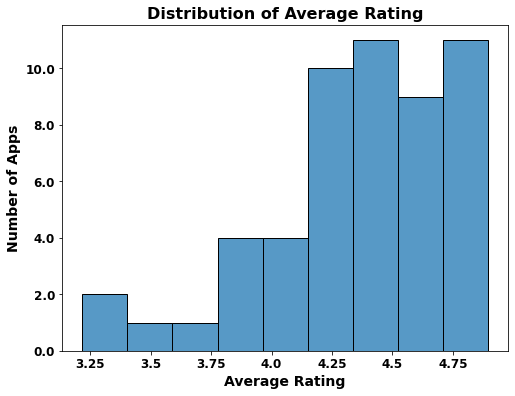

In [26]:
## Plot distribution of average scores
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='score')
g.set_title('Distribution of Average Rating',
            fontdict = {'weight': 'bold', 'size':16})
g.set_xlabel('Average Rating',
            fontdict = {'weight': 'bold', 'size':14})
g.set_xticklabels(g.get_xticks(),
                  fontdict = {'weight': 'bold', 'size':12})
g.set_ylabel('Number of Apps',
            fontdict = {'weight': 'bold', 'size':14})
g.set_yticklabels(g.get_yticks(),
                  fontdict = {'weight': 'bold', 'size':12});

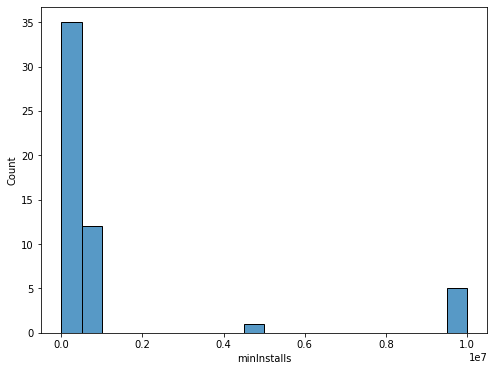

In [27]:
## Plot distribution of installs
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='minInstalls');

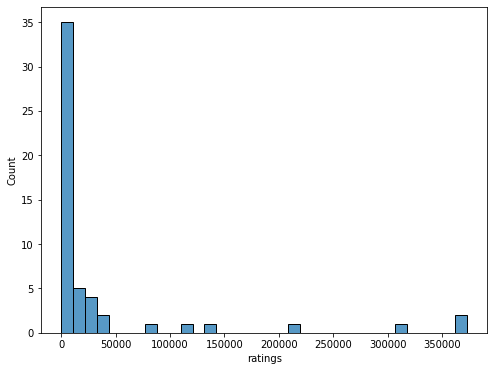

In [28]:
## Plot distribution of ratings
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='ratings');

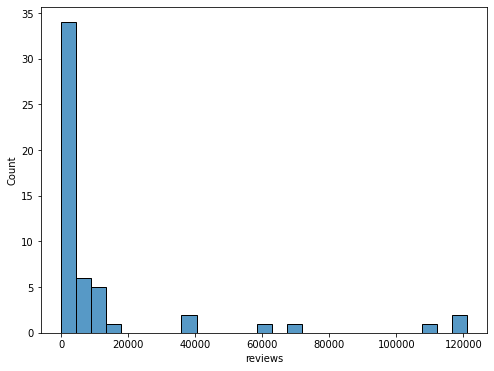

In [29]:
## Plot distribution of reviews
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='reviews');